In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression

C:\Users\ashu_\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [4]:
df=pd.read_csv("Heart1.csv")

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df=df.drop_duplicates()

In [8]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [11]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
df.fbs.unique()

array([1, 0], dtype=int64)

In [13]:
subSet1=df[['age','cp','chol','thalachh']]

In [14]:
subSet2=df[['exng','slp','output']]

In [16]:
merged_df=subSet1.merge(right=subSet2,how='cross')
merged_df

,age,cp,chol,thalachh,exng,slp,output
0,63,3,233,150,0,0,1
1,63,3,233,150,0,0,1
2,63,3,233,150,0,2,1
3,63,3,233,150,0,2,1
4,63,3,233,150,1,2,1
...,...,...,...,...,...,...,...
91199,57,1,236,174,1,1,0
91200,57,1,236,174,0,1,0
91201,57,1,236,174,0,1,0
91202,57,1,236,174,1,1,0


In [17]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [18]:
def remove_outliers(column):
    Q1=column.quantile(0.25)
    Q2=column.quantile(0.75)
    IQR=Q2-Q1
    threshold=1.5*IQR
    outliers_mask= (column < Q1-threshold) | (column > Q2+threshold)
    return column[~outliers_mask]

In [20]:
col_name=['cp','thalachh','exng','oldpeak','slp','caa']
for col in col_name:
    df[col]=remove_outliers(df[col])

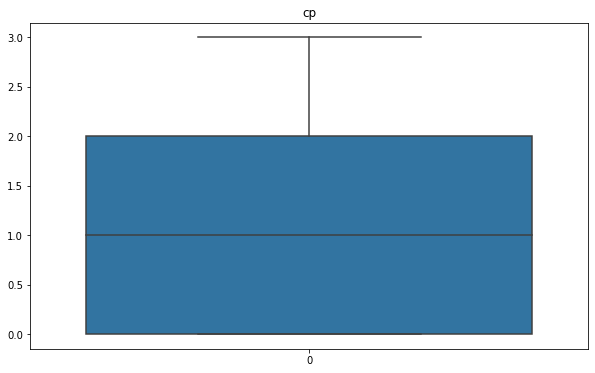

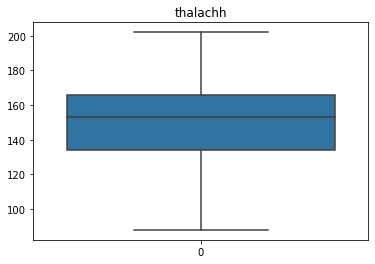

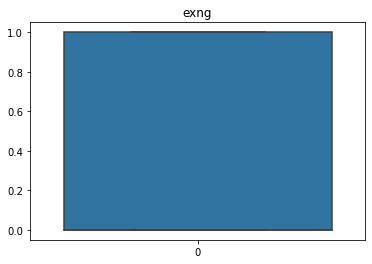

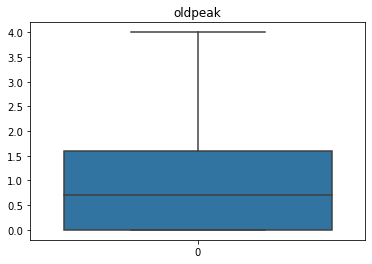

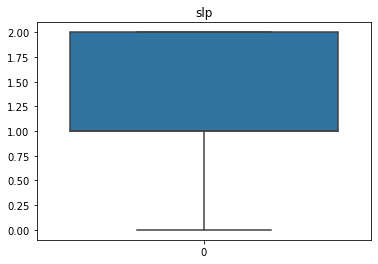

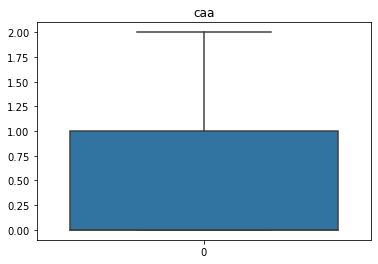

In [21]:
plt.figure(figsize=(10,6))

for col in col_name:
    sns.boxplot(data=df[col])
    plt.title(col)
    plt.show()

In [22]:
df=df.dropna()

In [23]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [24]:
df=df.drop('fbs',axis=1)

Correlation with the Target:
age        -0.193798
sex        -0.303271
cp          0.410807
trtbps     -0.135238
chol       -0.052796
restecg     0.122071
thalachh    0.384609
exng       -0.444401
oldpeak    -0.437895
slp         0.329432
caa        -0.460816
thall      -0.366390
Name: output, dtype: float64



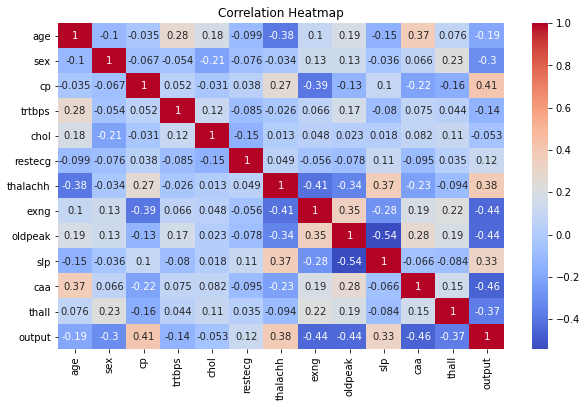

In [26]:
correlations=df.corr()['output'].drop('output')

print("Correlation with the Target:")
print(correlations)
print()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [28]:
x=df[['cp','thalachh','exng','oldpeak','slp','caa']]
y=df.output
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((206, 6), (69, 6), (206,), (69,))

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler=StandardScaler()

In [31]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [32]:
y_train=np.array(y_train).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

In [33]:
y_train.shape

(206, 1)

In [34]:
model=LogisticRegression()
model.fit(x_train_scaled, y_train)

y_pred=model.predict(x_test_scaled)

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

C:\Users\ashu_\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 0.8405797101449275


In [35]:
from sklearn.tree import DecisionTreeClassifier
tc=DecisionTreeClassifier(criterion='entropy')
tc.fit(x_train_scaled,y_train)
y_pred=tc.predict(x_test_scaled)

print("Training Accuracy Score :", accuracy_score(y_pred,y_test))
print("Training Confusion Matrix :", confusion_matrix(y_pred,y_test))

Training Accuracy Score : 0.7971014492753623
Training Confusion Matrix : [[22  4]
 [10 33]]
